<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Code Library, Styling, and Links</h1>
<details><summary style='color:#37c9e1; font-family:Orbitron;'>Github</summary><br/>

The current notebook
    
&#x1F4D8; &nbsp; [Python Version](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/passnyc-regression-methods.ipynb)
    
The previous notebook

&#x1F4D8; &nbsp; [Python Version](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/passnyc-comparing-all-districts-with-5th-district.ipynb)

<details><summary style='color:#37c9e1; font-family:Orbitron;'>Useful Links</summary><br/>

&#x1F4E1; &nbsp; [School Quality Reports. Educator Guide](http://schools.nyc.gov/NR/rdonlyres/967E0EE1-7E5D-4E47-BC21-573FEEE23AE2/0/201516EducatorGuideHS9252017.pdf)
    
&#x1F4E1; &nbsp; [New York City Department of Education](https://www.schools.nyc.gov)

&#x1F4E1; &nbsp; [NYC OpenData](https://opendata.cityofnewyork.us/)

&#x1F4E1; &nbsp; [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
    
&#x1F4E1; &nbsp; [Pandas Styling](https://pandas.pydata.org/pandas-docs/stable/style.html)

&#x1F4E1; &nbsp; [ggplot2](https://ggplot2.tidyverse.org/)

&#x1F4E1; &nbsp; [R Tutorial](https://www.tutorialspoint.com/r/index.htm)

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto&effect=3d');
body {background-color: gainsboro;} 
h3 {color:#818286; font-family:Roboto;}
span {color:black; text-shadow:4px 4px 4px #aaa;}
div.output_prompt,div.output_area pre {color:slategray;}
div.input_prompt,div.output_subarea {color:#37c9e1;}      
div.output_stderr pre {background-color:gainsboro;}  
div.output_stderr {background-color:slategrey;}       
</style>

In [2]:
import numpy as np,pandas as pd,geopandas as gpd
import pylab as plt,seaborn as sns
from matplotlib import cm
import matplotlib.colors as mcolors
from descartes import PolygonPatch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error,mean_absolute_error
from sklearn.metrics import r2_score,explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.linear_model import BayesianRidge,RANSACRegressor
from sklearn.linear_model import HuberRegressor,TheilSenRegressor
style_dict={'background-color':'slategray','color':'#37c9e1',
            'border-color':'white','font-family':'Roboto'}
plt.style.use('seaborn-whitegrid'); path='../input/'

In [3]:
def regression(regressor,x_train,x_test,y_train):
    regressor.fit(x_train,y_train)   
    y_train_reg=regressor.predict(x_train)
    y_test_reg=regressor.predict(x_test)    
    return y_train_reg,y_test_reg
def scores(regressor,y_train,y_test,y_train_reg,y_test_reg):
    print(50*"_"); print(regressor); print(50*"_")
    print("EV score. Train: ",
          explained_variance_score(y_train,y_train_reg))
    print("EV score. Test: ",
          explained_variance_score(y_test,y_test_reg))
    print(20*"-")
    print("R2 score. Train: ",r2_score(y_train,y_train_reg))
    print("R2 score. Test: ",r2_score(y_test,y_test_reg))
    print(20*"-")
    print("MSE score. Train: ",
          mean_squared_error(y_train,y_train_reg))
    print("MSE score. Test: ",
          mean_squared_error(y_test,y_test_reg))
    print(20*"-")
    print("MAE score. Train: ",
          mean_absolute_error(y_train,y_train_reg))
    print("MAE score. Test: ",
          mean_absolute_error(y_test,y_test_reg))
    print(20*"-")
    print("MdAE score. Train: ",
          median_absolute_error(y_train,y_train_reg))
    print("MdAE score. Test: ",
          median_absolute_error(y_test,y_test_reg))

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Data Loading and Preprocessing</h1>

In [4]:
school_explorer=pd.read_csv(path+'2016 School Explorer.csv')
d5_shsat=pd.read_csv(path+'D5 SHSAT Registrations and Testers.csv')
school_explorer.shape,d5_shsat.shape

((1272, 161), (140, 7))

In [5]:
drop_list=['Adjusted Grade','New?','Other Location Code in LCGMS']
school_explorer=school_explorer.drop(drop_list,axis=1)
# Replace the same values
school_explorer.loc[[427,1023,712,908],'School Name']=\
['P.S. 212 D12','P.S. 212 D30','P.S. 253 D21','P.S. 253 D27']
# Transform from string to numeric values 
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype('str') 
for s in [",","$"," "]:
    school_explorer['School Income Estimate']=\
    school_explorer['School Income Estimate'].str.replace(s,"")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].str.replace("nan","0")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype(float)
school_explorer['School Income Estimate'].replace(0,np.NaN,inplace=True)
percent_list = ['Percent ELL','Percent Asian','Percent Black',
                'Percent Hispanic','Percent Black / Hispanic',
                'Percent White','Student Attendance Rate',
                'Percent of Students Chronically Absent',
                'Rigorous Instruction %','Collaborative Teachers %',
                'Supportive Environment %','Effective School Leadership %',
                'Strong Family-Community Ties %','Trust %']
target_list = ['Average ELA Proficiency','Average Math Proficiency']
economic_list = ['Economic Need Index','School Income Estimate']
rating_list = ['Rigorous Instruction Rating','Collaborative Teachers Rating',
               'Supportive Environment Rating','Effective School Leadership Rating',
               'Strong Family-Community Ties Rating','Trust Rating',
               'Student Achievement Rating']
# Transform to numeric variables and fillna missing values
for el in percent_list:
    school_explorer[el]=school_explorer[el].astype('str')
    school_explorer[el]=school_explorer[el].str.replace("%","")
    school_explorer[el]=school_explorer[el].str.replace("nan","0")
    school_explorer[el]=school_explorer[el].astype(float)
    school_explorer[el].replace(0,np.NaN,inplace=True)
    school_explorer[el]=school_explorer[el].interpolate()
for el in target_list+economic_list:
    school_explorer[el]=school_explorer[el].interpolate()
for el in rating_list:
    moda_value=school_explorer[el].value_counts().idxmax()
    school_explorer[el]=school_explorer[el].fillna(moda_value)
# Preprocess categorical features      
category_list=['District','Community School?','City','Grades']     
for feature in category_list:
    feature_cat=pd.factorize(school_explorer[feature])
    school_explorer[feature]=feature_cat[0]
for feature in rating_list:
    feature_pairs=dict(zip(['Not Meeting Target','Meeting Target', 
                            'Approaching Target','Exceeding Target'],
                             ['0','2','1','3']))
    school_explorer[feature].replace(feature_pairs,inplace=True)
    school_explorer[feature]=school_explorer[feature].astype(int)  
category_list=list(category_list+rating_list)
numeric_list=list(school_explorer\
.columns[[4,5]+list(range(13,24))+[25,27,29,31,33]+list(range(38,158))])    
print('Number of Missing Values: ',sum(school_explorer.isna().sum()))

Number of Missing Values:  0


In [6]:
# Create a new dataframe
sat_list=['DBN','Number of students who registered for the SHSAT',
          'Number of students who took the SHSAT']
d5_shsat_2016=d5_shsat[sat_list][d5_shsat['Year of SHST']==2016]\
.groupby(['DBN'],as_index=False).agg(np.sum)
# Create a new variable
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Number of students who took the SHSAT']\
/d5_shsat_2016['Number of students who registered for the SHSAT']
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Took SHSAT %'].fillna(0).apply(lambda x: round(x,3))
d5_shsat_2016.rename(columns={'DBN':'Location Code'},inplace=True)
# Merge dataframes
d5_shsat_2016=\
pd.merge(school_explorer[['Location Code']+numeric_list+\
                         category_list+target_list],
                         d5_shsat_2016, on='Location Code')
d5_shsat_2016.shape

(21, 155)

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Data Splitting for Regressor Training </h1>
### The first set of features

In [7]:
# data = school_explorer, features = numeric veriables, targets = Average Math Proficiency
features1=school_explorer[numeric_list].values
targets1=school_explorer['Average Math Proficiency'].values
X_train1,X_test1,y_train1,y_test1=\
train_test_split(features1,targets1,test_size=.2,random_state=1)
X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape

((1017, 138), (255, 138), (1017,), (255,))

In [8]:
# data = school_explorer, features = numeric veriables, targets = Average ELA Proficiency
targets2=school_explorer['Average ELA Proficiency'].values
X_train2,X_test2,y_train2,y_test2 = \
train_test_split(features1,targets2,test_size=.2,random_state=1)
X_train2.shape,X_test2.shape,y_train2.shape,y_test2.shape

((1017, 138), (255, 138), (1017,), (255,))

### The second set of features

In [9]:
# data = school_explorer, targets = Average Math Proficiency
features_list=numeric_list+category_list 
features2=school_explorer[features_list].values
X_train3,X_test3,y_train3,y_test3=\
train_test_split(features2,targets1,test_size=.2,random_state=1)
X_train3.shape,X_test3.shape,y_train3.shape,y_test3.shape

((1017, 149), (255, 149), (1017,), (255,))

In [10]:
# data = school_explorer, targets = Average ELA Proficiency
X_train4,X_test4,y_train4,y_test4=\
train_test_split(features2,targets2,test_size=.2,random_state=1)
X_train4.shape,X_test4.shape,y_train4.shape,y_test4.shape

((1017, 149), (255, 149), (1017,), (255,))

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Fitting the Regressors</h1>
### The first set of features
The predictions are based on the data about the financial situation, social environment, ethnic composition and test results of each grade.

In [11]:
y_train_gbr1,y_test_gbr1=\
regression(GradientBoostingRegressor(max_depth=4,n_estimators=138), 
           X_train1,X_test1,y_train1)
scores('Gradient Boosting Regressor \nAverage Math Proficiency', 
       y_train1,y_test1,y_train_gbr1,y_test_gbr1)

__________________________________________________
Gradient Boosting Regressor 
Average Math Proficiency
__________________________________________________
EV score. Train:  0.9815852114203323
EV score. Test:  0.8940034537655157
--------------------
R2 score. Train:  0.9815852114203323
R2 score. Test:  0.8939996013711029
--------------------
MSE score. Train:  0.0040134599268851715
MSE score. Test:  0.022629852370949256
--------------------
MAE score. Train:  0.04885991734938183
MAE score. Test:  0.11447634557416922
--------------------
MdAE score. Train:  0.0398670038457154
MdAE score. Test:  0.0864675775210455


In [12]:
y_train_rfr1,y_test_rfr1=\
regression(RandomForestRegressor(n_estimators=138), 
           X_train1,X_test1,y_train1)
scores('Random Forest Regressor \nAverage Math Proficiency', 
       y_train1,y_test1,y_train_rfr1,y_test_rfr1)

__________________________________________________
Random Forest Regressor 
Average Math Proficiency
__________________________________________________
EV score. Train:  0.9771178093192124
EV score. Test:  0.8835136007230344
--------------------
R2 score. Train:  0.9771051600572893
R2 score. Test:  0.8834979890656782
--------------------
MSE score. Train:  0.004989876600808487
MSE score. Test:  0.024871824469193043
--------------------
MAE score. Train:  0.05031930609588671
MAE score. Test:  0.12212841005967602
--------------------
MdAE score. Train:  0.0379710144927472
MdAE score. Test:  0.10065217391304238


In [13]:
y_train_gbr2,y_test_gbr2=\
regression(GradientBoostingRegressor(max_depth=5,n_estimators=276), 
           X_train2,X_test2,y_train2)
scores('Gradient Boosting Regressor \nAverage ELA Proficiency', 
       y_train2,y_test2,y_train_gbr2,y_test_gbr2)

__________________________________________________
Gradient Boosting Regressor 
Average ELA Proficiency
__________________________________________________
EV score. Train:  0.9991525930620759
EV score. Test:  0.8727051779506448
--------------------
R2 score. Train:  0.9991525930620759
R2 score. Test:  0.8725939888179979
--------------------
MSE score. Train:  0.000106556392191008
MSE score. Test:  0.018298345205021896
--------------------
MAE score. Train:  0.007692157878821907
MAE score. Test:  0.0991524122304864
--------------------
MdAE score. Train:  0.00594831447178823
MdAE score. Test:  0.07284400910817679


In [14]:
y_train_rfr2,y_test_rfr2=\
regression(RandomForestRegressor(n_estimators=276), 
           X_train2,X_test2,y_train2)
scores('Random Forest Regressor \nAverage ELA Proficiency', 
       y_train1,y_test2,y_train_rfr2,y_test_rfr2)

__________________________________________________
Random Forest Regressor 
Average ELA Proficiency
__________________________________________________
EV score. Train:  0.8224392949646058
EV score. Test:  0.8438292567671563
--------------------
R2 score. Train:  0.7347359188627254
R2 score. Test:  0.8438145008441464
--------------------
MSE score. Train:  0.05781368355550666
MSE score. Test:  0.022431721651577672
--------------------
MAE score. Train:  0.18639284280753754
MAE score. Test:  0.10775965591550618
--------------------
MdAE score. Train:  0.14818840579709347
MdAE score. Test:  0.07846014492753062


### The second set of features
The predictions are based on the data about the financial situation, social environment, ethnic composition, test results for each grade and geodata.

In [15]:
y_train_gbr3,y_test_gbr3=\
regression(GradientBoostingRegressor(max_depth=4,n_estimators=81), 
           X_train3,X_test3,y_train3)
scores('Gradient Boosting Regressor \nAverage Math Proficiency', 
       y_train3,y_test3,y_train_gbr3,y_test_gbr3)

__________________________________________________
Gradient Boosting Regressor 
Average Math Proficiency
__________________________________________________
EV score. Train:  0.9717626146865521
EV score. Test:  0.8997821410898033
--------------------
R2 score. Train:  0.9717626146865521
R2 score. Test:  0.8996169508626961
--------------------
MSE score. Train:  0.006154271818285729
MSE score. Test:  0.021430613581708266
--------------------
MAE score. Train:  0.06038761631827771
MAE score. Test:  0.11171525728327147
--------------------
MdAE score. Train:  0.049753530138183066
MdAE score. Test:  0.09415869775491004


In [16]:
y_train_rfr3,y_test_rfr3=\
regression(RandomForestRegressor(n_estimators=81), 
           X_train3,X_test3,y_train3)
scores('Random Forest Regressor \nAverage Math Proficiency', 
       y_train3,y_test3,y_train_rfr3,y_test_rfr3)

__________________________________________________
Random Forest Regressor 
Average Math Proficiency
__________________________________________________
EV score. Train:  0.9796310691142811
EV score. Test:  0.8871704851525741
--------------------
R2 score. Train:  0.9796209472945167
R2 score. Test:  0.8871027330082477
--------------------
MSE score. Train:  0.0044415666803606525
MSE score. Test:  0.024102253558983423
--------------------
MAE score. Train:  0.046918339868328954
MAE score. Test:  0.11766130073428546
--------------------
MdAE score. Train:  0.03432098765432068
MdAE score. Test:  0.09185185185185096


In [17]:
y_train_gbr4,y_test_gbr4=\
regression(GradientBoostingRegressor(max_depth=4,n_estimators=108), 
           X_train4,X_test4,y_train4)
scores('Gradient Boosting Regressor \nAverage ELA Proficiency', 
       y_train4,y_test4,y_train_gbr4,y_test_gbr4)

__________________________________________________
Gradient Boosting Regressor 
Average ELA Proficiency
__________________________________________________
EV score. Train:  0.9768788926671613
EV score. Test:  0.8711900849746023
--------------------
R2 score. Train:  0.9768788926671613
R2 score. Test:  0.8711658874562027
--------------------
MSE score. Train:  0.002907341998973853
MSE score. Test:  0.018503452416710357
--------------------
MAE score. Train:  0.042012666810131466
MAE score. Test:  0.09769241460967318
--------------------
MdAE score. Train:  0.034864119319812925
MdAE score. Test:  0.07179847658580929


In [18]:
y_train_rfr4,y_test_rfr4=\
regression(RandomForestRegressor(n_estimators=108), 
           X_train4,X_test4,y_train4)
scores('Random Forest Regressor \nAverage ELA Proficiency', 
       y_train4,y_test4,y_train_rfr4,y_test_rfr4)

__________________________________________________
Random Forest Regressor 
Average ELA Proficiency
__________________________________________________
EV score. Train:  0.977263300955025
EV score. Test:  0.8513981353003841
--------------------
R2 score. Train:  0.9772555260802042
R2 score. Test:  0.8513877631432258
--------------------
MSE score. Train:  0.002859982582999818
MSE score. Test:  0.02134403225143805
--------------------
MAE score. Train:  0.03862079676365986
MAE score. Test:  0.10338235294117643
--------------------
MdAE score. Train:  0.02962962962963145
MdAE score. Test:  0.07666280864197539


<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'>&#x1F310; &nbsp; Predictions </h1>
### The first set of features

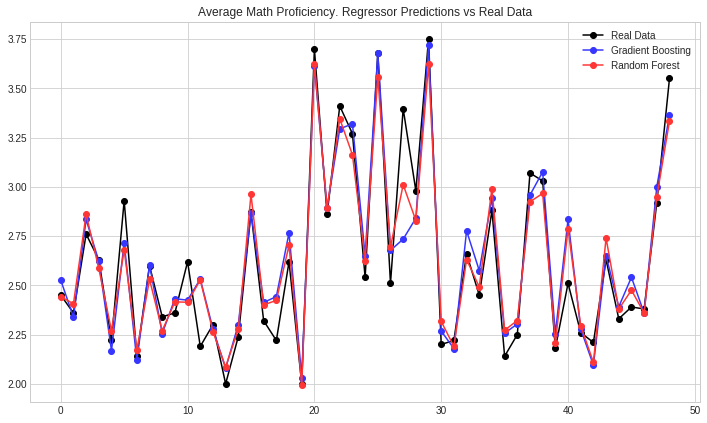

In [19]:
plt.figure(figsize=(12,7))
plt.plot(y_test1[1:50],'-o',color='black',label='Real Data')
plt.plot(y_test_gbr1[1:50],'-o',color='#3636ff',label='Gradient Boosting')
plt.plot(y_test_rfr1[1:50],'-o',color='#ff3636',label='Random Forest')
plt.legend()
plt.title("Average Math Proficiency. Regressor Predictions vs Real Data");

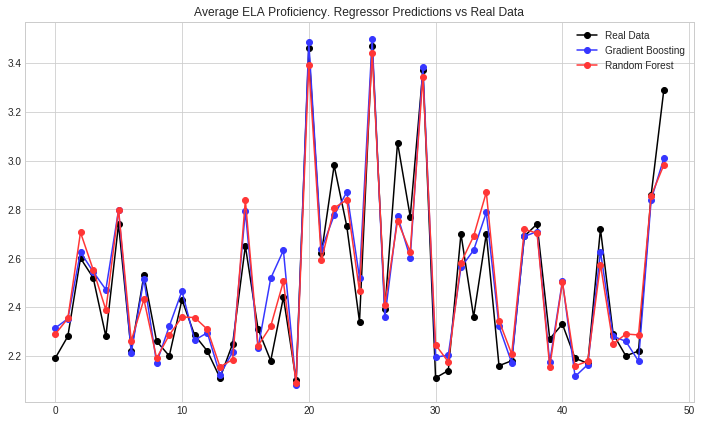

In [20]:
plt.figure(figsize=(12,7))
plt.plot(y_test2[1:50],'-o',color='black',label='Real Data')
plt.plot(y_test_gbr2[1:50],'-o',color='#3636ff',label='Gradient Boosting')
plt.plot(y_test_rfr2[1:50],'-o',color='#ff3636',label='Random Forest')
plt.legend()
plt.title("Average ELA Proficiency. Regressor Predictions vs Real Data");

### The second set of features

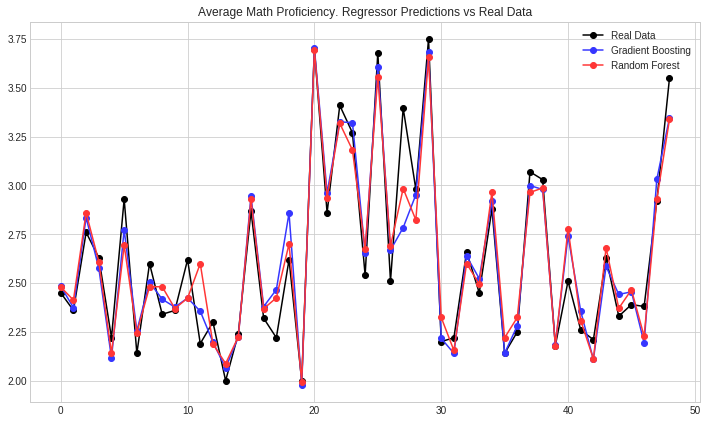

In [21]:
plt.figure(figsize=(12,7))
plt.plot(y_test3[1:50],'-o',color='black',label='Real Data')
plt.plot(y_test_gbr3[1:50],'-o',color='#3636ff',label='Gradient Boosting')
plt.plot(y_test_rfr3[1:50],'-o',color='#ff3636',label='Random Forest')
plt.legend()
plt.title("Average Math Proficiency. Regressor Predictions vs Real Data");

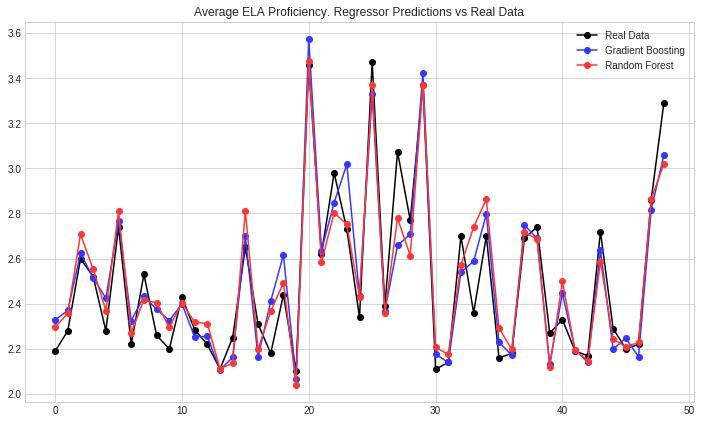

In [22]:
plt.figure(figsize=(12,7))
plt.plot(y_test4[1:50],'-o',color='black',label='Real Data')
plt.plot(y_test_gbr4[1:50],'-o',color='#3636ff',label='Gradient Boosting')
plt.plot(y_test_rfr4[1:50],'-o',color='#ff3636',label='Random Forest')
plt.legend()
plt.title("Average ELA Proficiency. Regressor Predictions vs Real Data");

Both sets of variables in the presented database about the financial situation, social environment, ethnic composition, geodata, and test results of each grade  make it possible to predict the indicators of learning outcomes `Average Math Proficiency`, `Average ELA Proficiency` quite well. 

- 0.85-0.90 is a really high level for `R2` - [(coefficient of determination)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'>&#x1F310; &nbsp; Features' Importance</h1>
### The first set of features

In [23]:
cmap=cm.get_cmap('Spectral',4); spectral_cmap=[]
for i in range(cmap.N):
    rgb=cmap(i)[:3]
    spectral_cmap.append(mcolors.rgb2hex(rgb))

In [24]:
df_importance1=pd.DataFrame(columns=range(138))
df_importance1.loc[0]=GradientBoostingRegressor(max_depth=4,n_estimators=138)\
.fit(X_train1,y_train1).feature_importances_
df_importance1.loc[1]=RandomForestRegressor(n_estimators=138)\
.fit(X_train1,y_train1).feature_importances_
df_importance1.loc[2]=GradientBoostingRegressor(max_depth=5,n_estimators=276)\
.fit(X_train2,y_train2).feature_importances_
df_importance1.loc[3]=RandomForestRegressor(n_estimators=276)\
.fit(X_train2,y_train2).feature_importances_

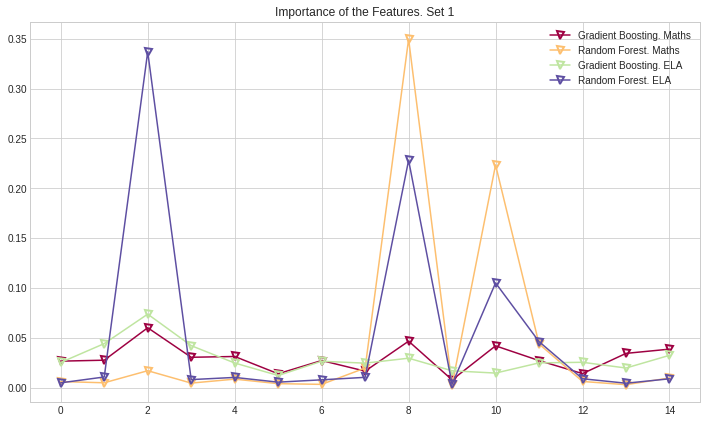

In [25]:
plt.figure(figsize=(12,7)); n=15
plt.plot(df_importance1.loc[0][:n],'-v',
         color=spectral_cmap[0],label='Gradient Boosting. Maths',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.plot(df_importance1.loc[1][:n],'-v',
         color=spectral_cmap[1],label='Random Forest. Maths',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.plot(df_importance1.loc[2][:n],'-v', 
         color=spectral_cmap[2],label='Gradient Boosting. ELA',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.plot(df_importance1.loc[3][:n],'-v', 
         color=spectral_cmap[3],label='Random Forest. ELA',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.legend()
plt.title("Importance of the Features. Set 1");

In [26]:
index_gbr_math1=list(df_importance1.loc[0,].sort_values(ascending=False)[:20].index)
index_rfr_math1=list(df_importance1.loc[1,].sort_values(ascending=False)[:20].index)
index_gbr_ela1=list(df_importance1.loc[2,].sort_values(ascending=False)[:20].index)
index_rfr_ela1=list(df_importance1.loc[3,].sort_values(ascending=False)[:20].index)

The most influential indicators for the variable `Average Math Proficiency`:

In [27]:
features1=school_explorer[numeric_list]
for el in list(features1.iloc[:,index_gbr_math1].columns):
    if el in list(features1.iloc[:,index_rfr_math1].columns):
        print(el)

Economic Need Index
Percent Black / Hispanic
Student Attendance Rate
Supportive Environment %
Grade 5 Math 4s - All Students
Percent ELL
Percent of Students Chronically Absent
Latitude
Grade 8 Math - All Students Tested
Strong Family-Community Ties %
Grade 6 Math 4s - All Students


The most influential indicators for the variable `Average ELA Proficiency`:

In [28]:
for el in list(features1.iloc[:,index_gbr_ela1].columns):
    if el in list(features1.iloc[:,index_rfr_ela1].columns):
        print(el)

Economic Need Index
Longitude
School Income Estimate
Supportive Environment %
Percent Black / Hispanic
Percent Black
Strong Family-Community Ties %
Rigorous Instruction %
Percent of Students Chronically Absent
Percent ELL
Percent Hispanic
Grade 3 Math 4s - All Students
Grade 5 ELA 4s - All Students
Grade 4 ELA 4s - All Students


### The second set of features

In [29]:
df_importance2=pd.DataFrame(columns=range(149))
df_importance2.loc[0]=GradientBoostingRegressor(max_depth=4,n_estimators=81)\
.fit(X_train3,y_train3).feature_importances_
df_importance2.loc[1]=RandomForestRegressor(n_estimators=81)\
.fit(X_train3,y_train3).feature_importances_
df_importance2.loc[2]=GradientBoostingRegressor(max_depth=4,n_estimators=108)\
.fit(X_train4,y_train4).feature_importances_
df_importance2.loc[3]=RandomForestRegressor(n_estimators=108)\
.fit(X_train4,y_train4).feature_importances_

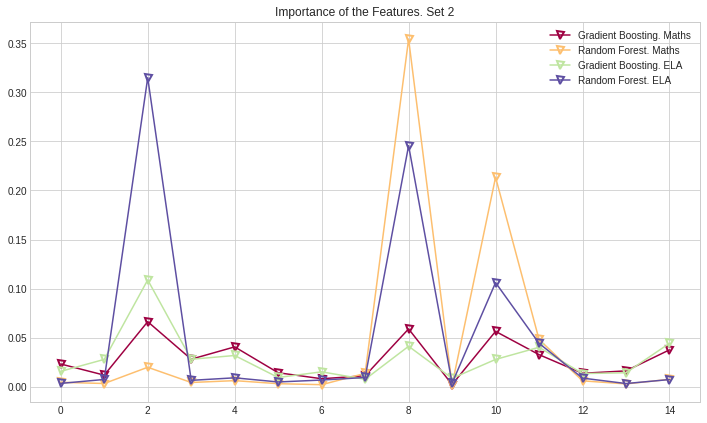

In [30]:
plt.figure(figsize=(12,7)); n=15
plt.plot(df_importance2.loc[0][:n],'-v',
         color=spectral_cmap[0],label='Gradient Boosting. Maths',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.plot(df_importance2.loc[1][:n],'-v',
         color=spectral_cmap[1],label='Random Forest. Maths',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.plot(df_importance2.loc[2][:n],'-v',
         color=spectral_cmap[2],label='Gradient Boosting. ELA',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.plot(df_importance2.loc[3][:n],'-v',
         color=spectral_cmap[3],label='Random Forest. ELA',
         markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.legend()
plt.title("Importance of the Features. Set 2");

In [31]:
index_gbr_math2=list(df_importance2.loc[0,].sort_values(ascending=False)[:15].index)
index_rfr_math2=list(df_importance2.loc[1,].sort_values(ascending=False)[:15].index)
index_gbr_ela2=list(df_importance2.loc[2,].sort_values(ascending=False)[:15].index)
index_rfr_ela2=list(df_importance2.loc[3,].sort_values(ascending=False)[:15].index)

The most influential indicators for the variable `Average Math Proficiency`:

In [32]:
features2=school_explorer[features_list]
for el in list(features2.iloc[:,index_gbr_math2].columns):
    if el in list(features2.iloc[:,index_rfr_math2].columns):
        print(el)

Economic Need Index
Percent Black / Hispanic
Student Attendance Rate
Student Achievement Rating
Percent ELL
Grade 5 Math 4s - All Students
Supportive Environment %
Percent of Students Chronically Absent
Grade 3 Math 4s - All Students
Grade 4 Math 4s - All Students


The most influential indicators for the variable `Average ELA Proficiency`:

In [33]:
for el in list(features2.iloc[:,index_gbr_ela2].columns):
    if el in list(features2.iloc[:,index_rfr_ela2].columns):
        print(el)

Economic Need Index
Supportive Environment %
Percent Black / Hispanic
Percent of Students Chronically Absent
Student Achievement Rating
Percent ELL
Longitude
Student Attendance Rate
Grade 5 ELA 4s - All Students
Grade 5 Math 4s - All Students


In general, we can make a list of the most influential indicators for the educational results.

- Financial: `Economic Need Index`
- Social: `Supportive Environment`
- Organizational: `Student Attendance Rate`, `Student Achievement Rating`, `Percent of Students Chronically Absent`
- Linguistical: `Percent ELL`
- Demographic: `Percent Black / Hispanic`

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Let's Go Ahead </h1>
It's time to move to the next step.

&#x1F4D8; &nbsp;  [PASSNYC. Neural Networks](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks)